In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
#Extract data into 'data'
data=pd.read_csv('country_wise_latest.csv')

In [4]:
#Show initial 5 entries of table
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [8]:
#Show last 5 records of table
data.tail()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa


In [9]:
#Display statistical properties of table
data.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [10]:
#Get detail about data-types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [11]:
#Display num of row & col of table
data.shape

(187, 15)

In [8]:
#Show column names of table
data.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [9]:
#Show num of unique entries in each column
data.nunique()

Country/Region            187
Confirmed                 184
Deaths                    150
Recovered                 178
Active                    173
New cases                 122
New deaths                 38
New recovered             103
Deaths / 100 Cases        145
Recovered / 100 Cases     177
Deaths / 100 Recovered    155
Confirmed last week       183
1 week change             162
1 week % increase         169
WHO Region                  6
dtype: int64

In [11]:
#data['Date'].unique()

In [12]:
#Show number of null entries in each column
data.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [14]:
#Dropping the redundant (unecessary) data.
#report=data.drop(['Province/State','Country/Region'],axis=1)

In [13]:
#Re-printing data after removal of unnecassary columns
data.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


<Axes: >

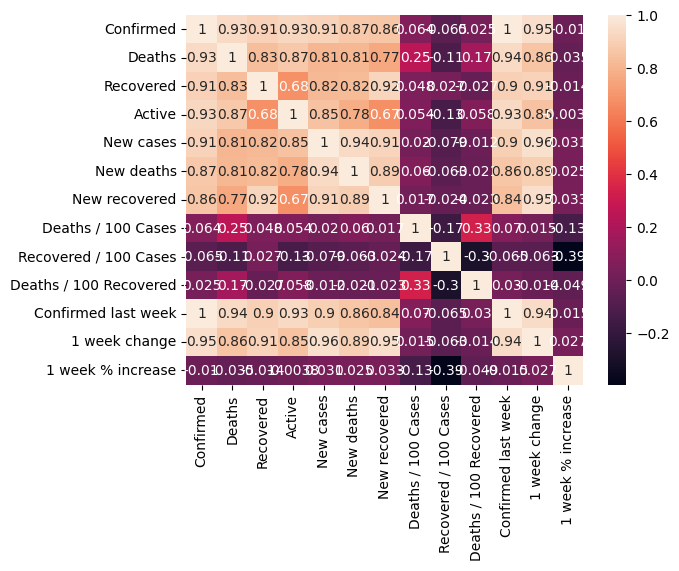

In [14]:
#Show correlation (How much strong relation among each variable) via heatmap
numeric_columns = data.select_dtypes(include=['number']).columns
corelation=data[numeric_columns].corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

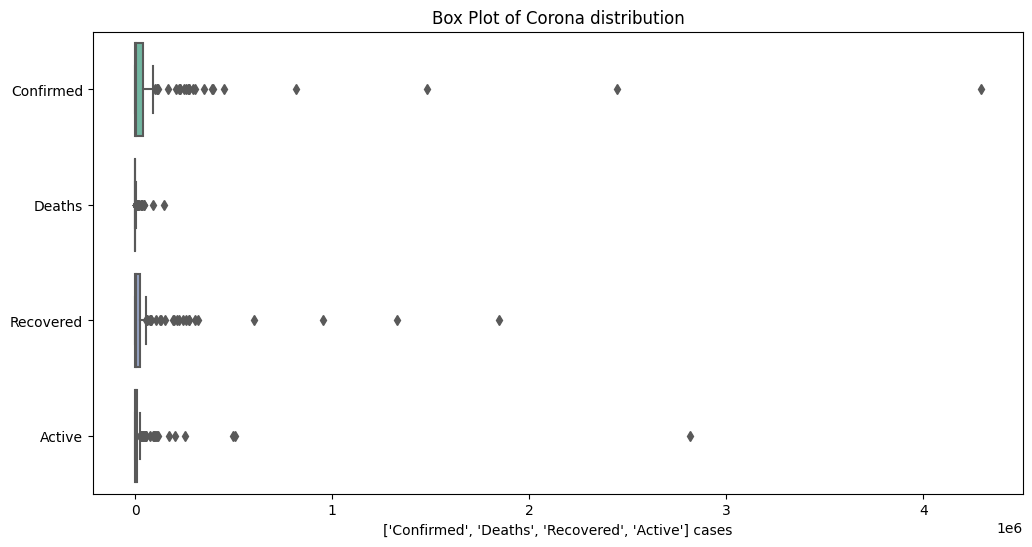

In [61]:
# Anomaly Detection via Box Plot

allcases = ['Confirmed', 'Deaths', 'Recovered', 'Active']
# Create a box plot for every cases
plt.figure(figsize=(12, 6))  
sns.boxplot(data=data[allcases], orient='h', palette='Set2', color = 'r')


# Add labels and title (optional)
plt.xlabel(f'{allcases} cases')
plt.title('Box Plot of Corona distribution')

# Show the plot
plt.show()

In [ ]:
#Interpretation:
# It has been seen that there are meaningless outliers for all the cases that ranges outside of the whiskers but the outliers
# scattering nearer to the whiskers could be handled and I'd initiate in next steps

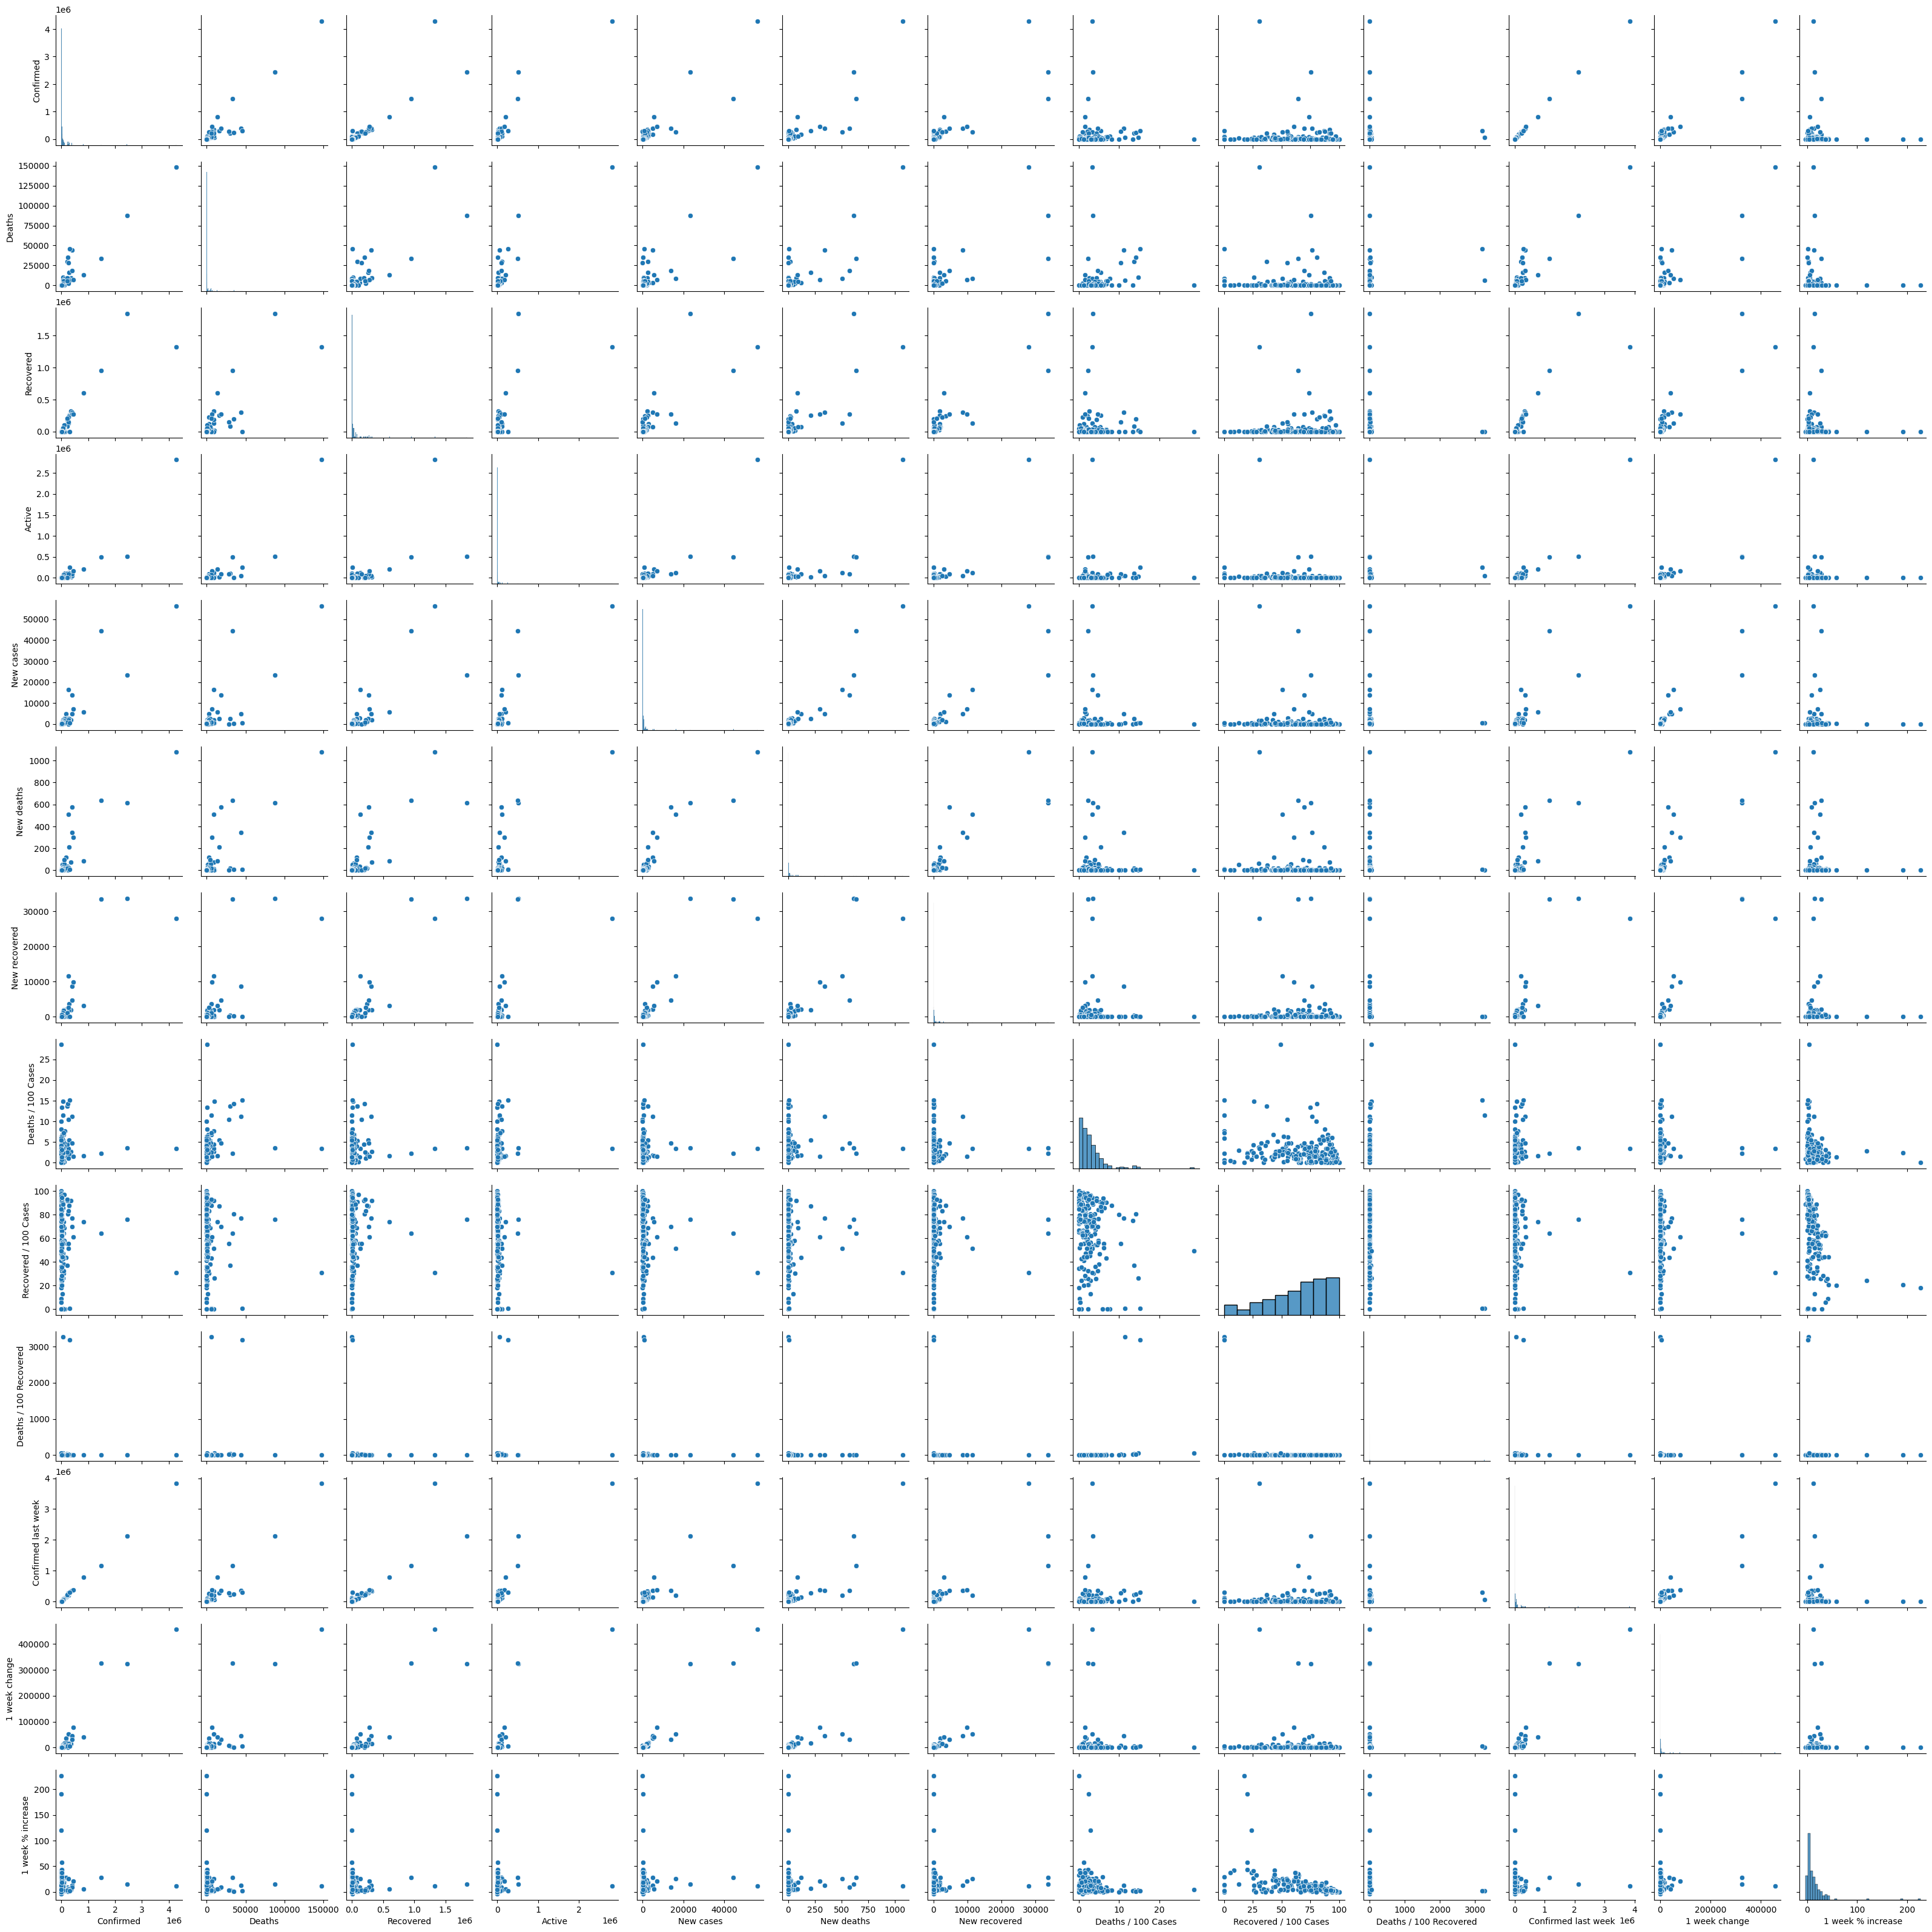

In [20]:
#Show scatter plot b/w each column via correlation
sns.pairplot(data)

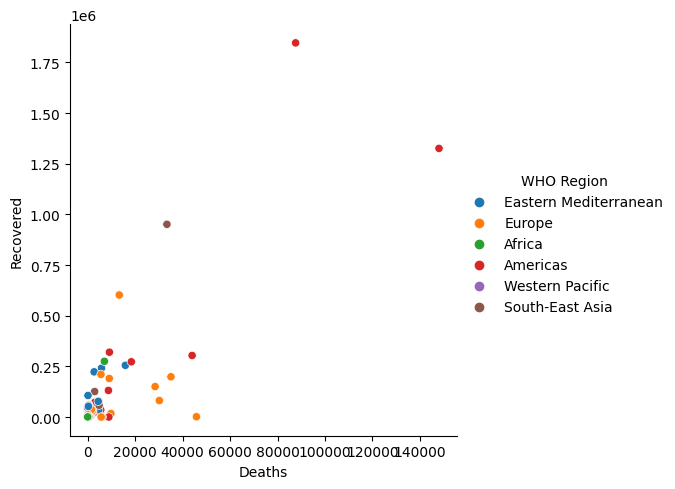

In [22]:
#Display scatter plot b/w deaths and recovered
sns.relplot(x='Deaths',y='Recovered',hue='WHO Region',data=data)

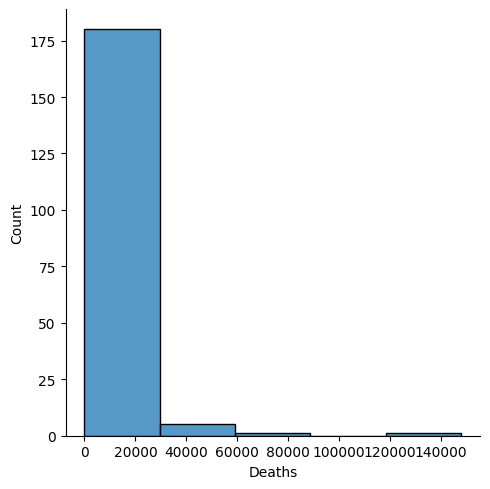

In [32]:
#SHow bar plot of deaths
sns.displot(data['Deaths'],bins=5)

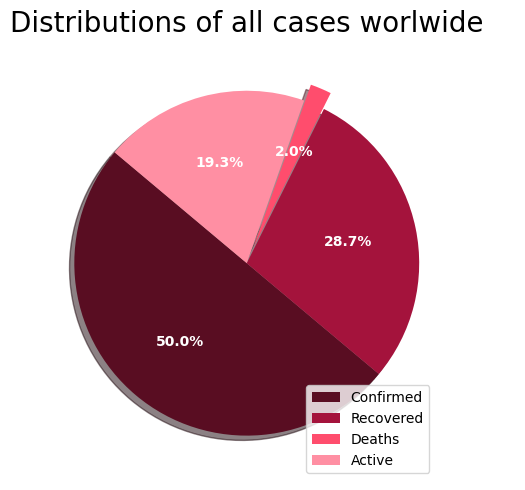

In [63]:
#Distribution of cases worldwide
df_intotalcases = data[['Confirmed','Recovered', 'Deaths', 'Active']].sum()
label = ['Confirmed','Recovered', 'Deaths', 'Active']
color_scale = ['#590d22','#a4133c','#ff4d6d','#ff8fa3']

plt.figure(figsize = (5,5))
plt.pie(df_intotalcases, labels = label, autopct = '%1.1f%%', explode = (0,0,0.1,0) ,colors = color_scale, startangle = 140, shadow = True, textprops={'color': 'white','weight': 'bold'})
plt.title("Distributions of all cases worlwide", fontsize = 20)

plt.axis('equal')

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Insight:
#It's seen that half of the cases are of from "confirmed" which tells us that the world is in an outspread of corona 
#disease and massive amounts of treatments and quarantines are needed to increase the percentage of "recovered" cases.
#However, death rate had been the least among all the cases but 1.9% out of 8,045,311,447 people in this world is too much,
#that's almost as if 152,860,917 were killed by this disease.
#We need to take immediate measures to lessen these death rate and send help to what country/region needs the most.

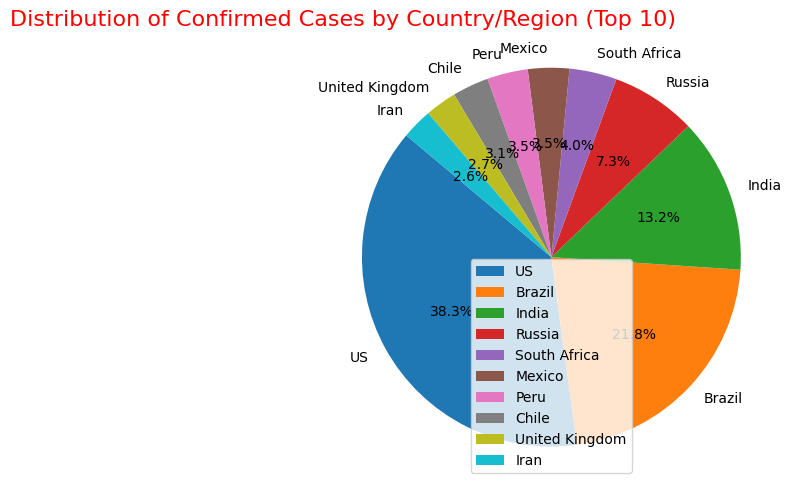

In [65]:
# Calculating the sum of Confirmed cases for each country and select the top 10
country_totals = data.groupby('Country/Region')['Confirmed'].sum().nlargest(10)

# Creating a pie chart
plt.figure(figsize=(5,5))
plt.pie(country_totals, labels=country_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Confirmed Cases by Country/Region (Top 10)', fontsize = 16, color='r', loc='left', horizontalalignment='center')
plt.axis('equal')  

# Showing the pie chart
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
#Remove all null entries from each column of table stored in 'data'
data = data.dropna(subset=['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'])

In [46]:
#Confirm that all the values are sucessfully removed
missing = []
x = data.columns
for i in x:
 missing.append(data[i].isna().sum())
missing

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

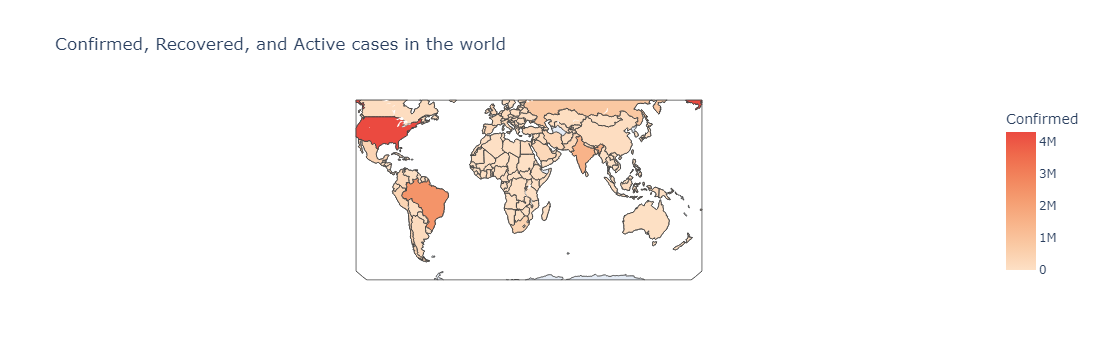

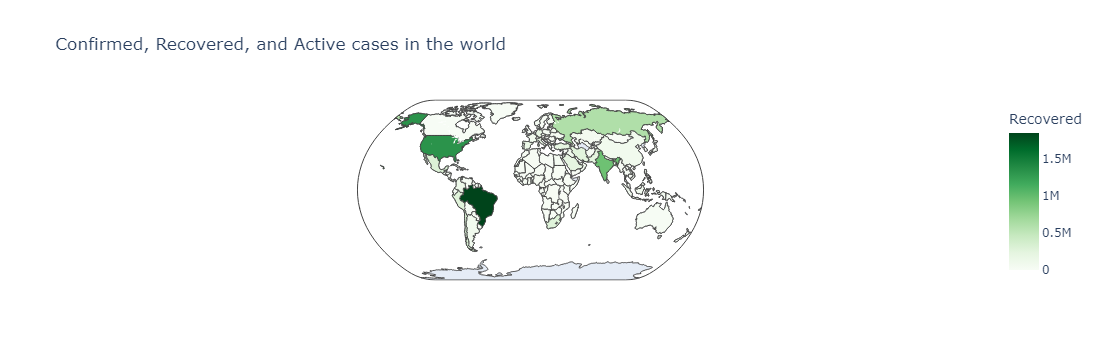

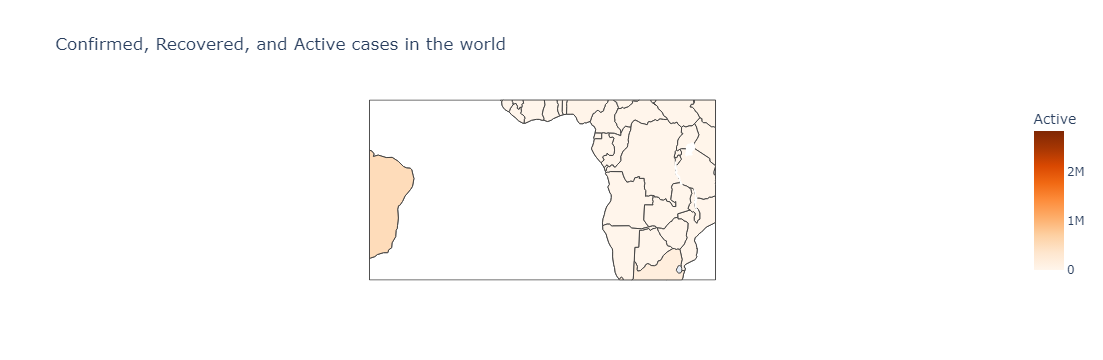

In [49]:
#Show a map that will show Active, Recovered & Confirmed cases in globe to highlight country areas
import plotly.express as px

def plot_map(data, location_names, location_mode, data_column, scope, title='', palette='Peach'):
    fig = px.choropleth(
        data,
        locations=location_names,
        locationmode=location_mode,
        color=data_column,
        hover_name=location_names,
        projection="natural earth",
        title=title,
        color_continuous_scale=palette  # Pass the palette as a string
    )
    fig.show()


# Define the location names and data columns
location_names = 'Country/Region'
location_mode = 'country names'

scope = 'world'
title = 'Confirmed, Recovered, and Active cases in the world'

# Call the modified plot_map function to display 'Confirmed', 'Recovered', and 'Active' separately
plot_map(data, location_names, location_mode, 'Confirmed', scope, title=title, palette='Peach')
plot_map(data, location_names, location_mode, 'Recovered', scope, title=title, palette='Greens')
plot_map(data, location_names, location_mode, 'Active', scope, title=title, palette='Oranges')

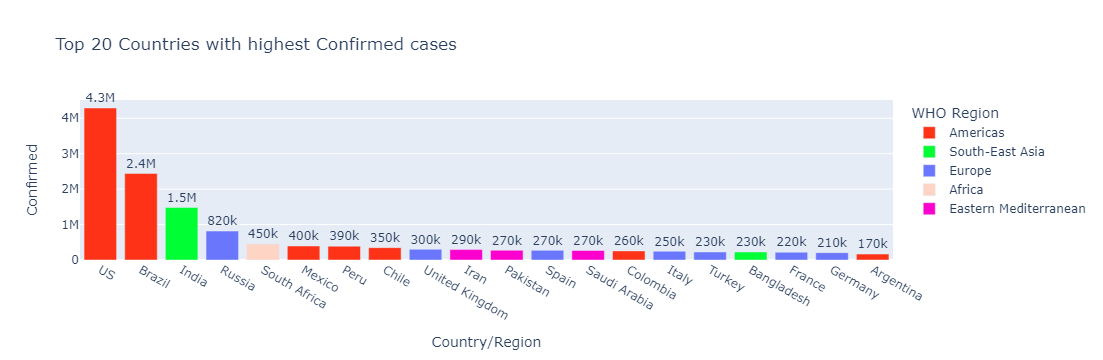

In [51]:
#Show top 20 countries with highest confirmed cases
def get_countries(df, col, color_scale='Twilight'):
    highest_col_cases = df.sort_values(col, ascending=False)[:20]

    fig = px.bar(
        highest_col_cases,
        x='Country/Region',
        y=col,
        color='WHO Region',
        title=f'Top 20 Countries with highest {col} cases',
        text_auto='.2s',
        color_discrete_sequence=px.colors.qualitative.Light24,  # Use your desired color scale here
        color_continuous_scale=color_scale  # Set the color scale to 'Twilight'
    )
    fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
    fig.update_layout(xaxis_categoryorder='total descending')
    
    fig.show()

get_countries(data, col='Confirmed', color_scale='Twilight')

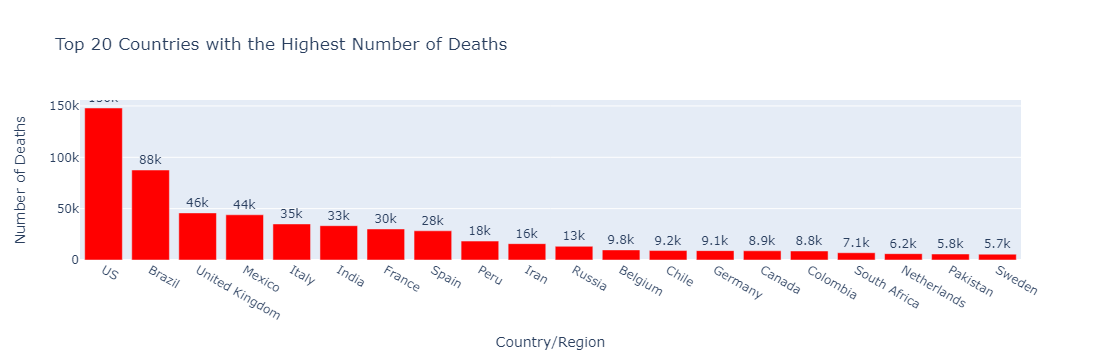

In [53]:
#Top 20 countries with highest number of death cases
import plotly.express as px
# Modified get_countries function to find the top 20 countries with the highest deaths
def get_top_countries_by_deaths(df, top_n=20, color='red'):
    top_deaths = df.nlargest(top_n, 'Deaths')
    
    fig = px.bar(
        top_deaths,
        x='Country/Region',
        y='Deaths',
        title=f'Top {top_n} Countries with the Highest Number of Deaths',
        text='Deaths',
        labels={'Deaths': 'Number of Deaths'},
        color_discrete_sequence=[color]  # Assign the desired color
    )
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(xaxis_categoryorder='total descending')
    fig.show()

# Example usage to find and display the top 20 countries with the highest deaths using a specific color
get_top_countries_by_deaths(data, top_n=20, color='red')

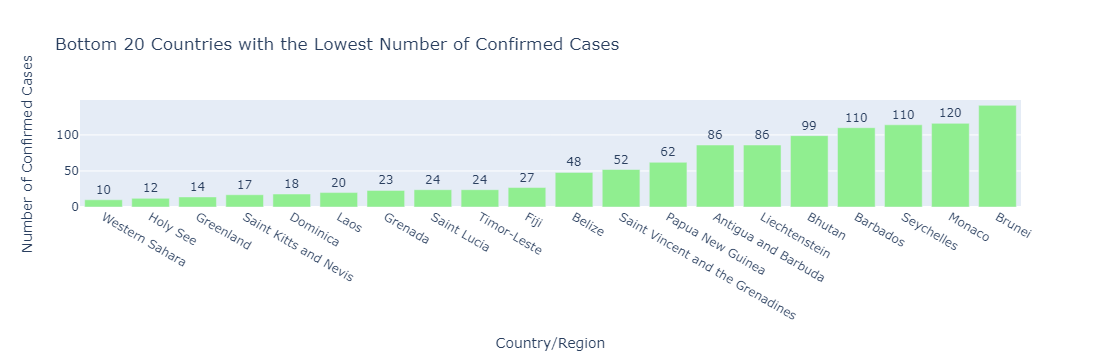

In [55]:
# Modified get_countries function to find the bottom 20 countries with the lowest confirmed cases
def get_bottom_countries_by_confirmed(df, bottom_n=20, color_scale='Twilight'):
    bottom_confirmed = df.nsmallest(bottom_n, 'Confirmed')
    
    fig = px.bar(
        bottom_confirmed,
        x='Country/Region',
        y='Confirmed',
        title=f'Bottom {bottom_n} Countries with the Lowest Number of Confirmed Cases',
        text='Confirmed',
        labels={'Confirmed': 'Number of Confirmed Cases'},
        color_discrete_sequence=[color_scale]  # Set the color scale to the one provided
    )
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(xaxis_categoryorder='total ascending')
    fig.show()

# Example usage to find and display the bottom 20 countries with the lowest confirmed cases with a different color scale
get_bottom_countries_by_confirmed(data, bottom_n=20, color_scale='lightgreen')

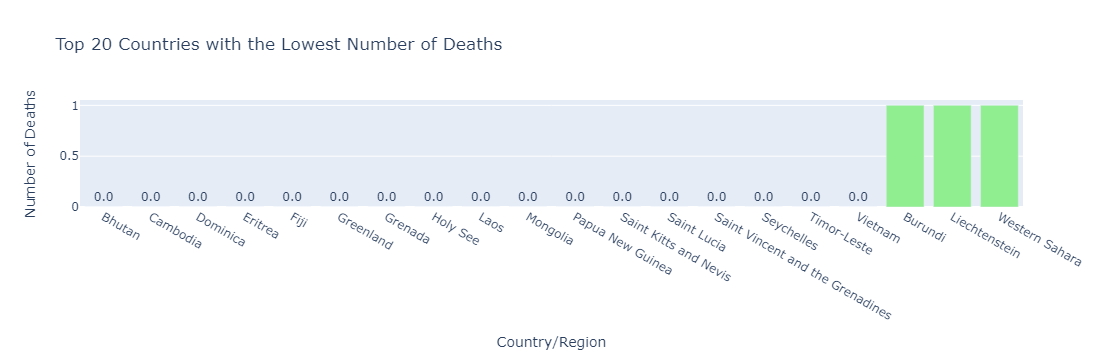

In [56]:
def get_lowest_countries_by_deaths(df, top_n=20, custom_color='lightgreen'):
    lowest_deaths = df.nsmallest(top_n, 'Deaths')
    
    fig = px.bar(
        lowest_deaths,
        x='Country/Region',
        y='Deaths',
        title=f'Top {top_n} Countries with the Lowest Number of Deaths',
        text='Deaths',
        labels={'Deaths': 'Number of Deaths'}
    )
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color=custom_color)
    fig.update_layout(xaxis_categoryorder='total ascending')
    fig.show()

# Example usage to find and display the top 20 countries with the lowest deaths using a custom color
get_lowest_countries_by_deaths(data, top_n=20, custom_color='lightgreen')

In [69]:
# Choose input features (X) and target variable (y)
X = data[['New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered']]
y = data['Confirmed']  # Replace 'Confirmed' with the column you want to predict


In [103]:
# Replace infinity with NaN
X = X.replace([np.inf, -np.inf], np.nan)
y = y.replace([np.inf, -np.inf], np.nan)

# Alternatively, you can drop rows containing NaN values
X = X.dropna()
y = y.dropna()

In [110]:
# Replace infinity with NaN
X = X.replace([np.inf, -np.inf], np.nan)
y = y.replace([np.inf, -np.inf], np.nan)

# Drop rows containing NaN values in both X and y
combined_data = pd.concat([X, y], axis=1).dropna()
X = combined_data.drop(columns=['Confirmed'])  # Adjust column name if needed
y = combined_data['Confirmed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [119]:
models=[LinearRegression(), KNeighborsRegressor(), SVR(), DecisionTreeRegressor(), 
        RandomForestRegressor()]
r2_scores=[]
for model in models:
    print("Model used:")
    display(model)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    r2=r2_score(y_test, y_pred)
    print(f"R2 Score: {r2}")
    r2_scores.append(r2)
    print("\n")
max_r2=max(r2_scores)
print(f"Best R2 Score Recorded: {max_r2}.")
max_idx=r2_scores.index(max_r2)
best_model=models[max_idx]
print(f"Best Model Performance: {best_model}.")

Model used:


LinearRegression()

R2 Score: 1.0


Model used:


KNeighborsRegressor()

R2 Score: 0.8898076641201191


Model used:


SVR()

R2 Score: -0.23713983347609102


Model used:


DecisionTreeRegressor()

R2 Score: 0.6969599034744487


Model used:


RandomForestRegressor()

R2 Score: 0.9284792941575116


Best R2 Score Recorded: 1.0.
Best Model Performance: LinearRegression().
